In [1]:
# %load_ext autoreload
# %autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "6_change_nan_anonymous"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [9]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [10]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [11]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# Merge Data

In [12]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [13]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [14]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [15]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [16]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [17]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [18]:
from util import inf2nan

def create_principal_maker_info_feature(input_df):
    '''作者の情報を追加'''
    out_df = pd.DataFrame()

    input_df_object_id = input_df['object_id']
    
    # 作成期間の平均の年を作成
    train['dating_year_mean'] = (train['dating_year_early'] + train['dating_year_late']) / 2
    test['dating_year_mean'] = (test['dating_year_early'] + test['dating_year_late']) / 2

    merge_df = pd.concat([train, test],axis=0).reset_index(drop=True)

    # 作成期間の平均までに稼いだ良いねの総数、作者の人気度指数
    out_df['object_id'] = merge_df['object_id']
    out_df['principal_maker'] = merge_df['principal_maker']
    out_df['dating_year_mean'] = merge_df['dating_year_mean']
    out_df['cumsum'] = merge_df.sort_values('dating_year_mean').groupby('principal_maker')['likes'].cumsum()
    out_df['cumsum_fillnan'] = out_df.sort_values('dating_year_mean').groupby('principal_maker')['cumsum'].ffill()

    # 作成期間の平均までに出した作品の数
    tmp_df = pd.DataFrame()
    tmp_df['object_id'] = train['object_id']
    tmp_df['cumcount'] = train.sort_values('dating_year_mean').groupby('principal_maker').cumcount()
    out_df = pd.merge(out_df, tmp_df, on='object_id', how='left')
    out_df['cumcount_fillnan'] = out_df.sort_values('dating_year_mean').groupby('principal_maker')['cumcount'].ffill()

    # 作成期間の平均における良いねの作品平均、作者の人気度指数
    out_df['cumsum_per_cumcount'] = out_df['cumsum_fillnan'] / out_df['cumcount_fillnan']
    out_df['cumsum_per_cumcount'] = inf2nan(out_df['cumsum_per_cumcount'])
    
    # anonymousはnanにする
    anonymous_idx = out_df[out_df['principal_maker'] == 'anonymous'].index
    out_df.loc[anonymous_idx,['cumsum_fillnan','cumcount_fillnan','cumsum_per_cumcount']] = np.nan
    
    # filter by id
    out_df = out_df[out_df['object_id'].isin(input_df_object_id)].reset_index(drop=True)

    return out_df[['cumsum_fillnan','cumcount_fillnan','cumsum_per_cumcount']].add_prefix('PrincipalMakerInfo_')

create_principal_maker_info_feature(train).head(20)

,PrincipalMakerInfo_cumsum_fillnan,PrincipalMakerInfo_cumcount_fillnan,PrincipalMakerInfo_cumsum_per_cumcount
0,78.0,2.0,39.000000
1,17.0,48.0,0.354167
2,193345.0,947.0,204.165787
3,188297.0,871.0,216.184845
4,NaN,NaN,NaN
5,3.0,2.0,1.500000
6,165.0,0.0,NaN
7,533.0,92.0,5.793478
8,1.0,2.0,0.500000
9,581.0,28.0,20.750000


In [19]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title'
        # and more
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title
0,21,48,39.0,21.0
1,15,64,17.0,15.0


In [20]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'title',
        'principal_maker',
        # and more
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_title,CE_principal_maker
0,4253,1,3
1,4253,1,180


In [21]:
def create_one_hot_encoding(input_df):
    use_columns = [
        'acquisition_method',
        'principal_maker'
    ]
    out_df = pd.DataFrame()
    for column in use_columns:

        # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
        vc = train[column].value_counts()
        vc = vc[vc > 20]

        # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
        cat = pd.Categorical(input_df[column], categories=vc.index)

        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

create_one_hot_encoding(train).head(2)

,acquisition_method=purchase,acquisition_method=transfer,acquisition_method=gift,acquisition_method=unknown,acquisition_method=bequest,acquisition_method=loan,acquisition_method=missing,acquisition_method=nationalization 1795,principal_maker=anonymous,principal_maker=other,...,principal_maker=James Valentine,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Gerard Edelinck,principal_maker=Augusta Curiel,principal_maker=Jean Baptiste August Kessler
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [23]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_acquisition_feature,
        create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        create_one_hot_encoding
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

  0%|          | 0/7 [00:00<?, ?it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.001[s]
createcreate_acquisition_feature  0.016[s]
createcreate_principal_maker_info_feature  0.083[s]
createcreate_string_length_feature  0.016[s]
createcreate_count_encoding_feature  0.013[s]
createcreate_one_hot_encoding  0.012[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.001[s]
createcreate_acquisition_feature  0.013[s]


100%|██████████| 7/7 [00:00<00:00, 46.57it/s]

createcreate_principal_maker_info_feature  0.070[s]
createcreate_string_length_feature  0.015[s]
createcreate_count_encoding_feature  0.014[s]
createcreate_one_hot_encoding  0.010[s]


In [24]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [25]:
train.head(2)

,likes,dating_period,dating_year_early,dating_year_late,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time,PrincipalMakerInfo_cumsum_fillnan,PrincipalMakerInfo_cumcount_fillnan,...,principal_maker=James Valentine,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Gerard Edelinck,principal_maker=Augusta Curiel,principal_maker=Jean Baptiste August Kessler
0,48,17,1660.0,1685.0,1808.0,1.0,4.0,15112288000,78.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1900.0,1930.0,2000.0,1.0,5.0,9053315200,17.0,48.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time,PrincipalMakerInfo_cumsum_fillnan,PrincipalMakerInfo_cumcount_fillnan,...,principal_maker=James Valentine,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Gerard Edelinck,principal_maker=Augusta Curiel,principal_maker=Jean Baptiste August Kessler
0,NaN,19,1850.0,1900.0,1994.0,1.0,5.0,9242617600,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,17,1609.0,1633.0,1798.0,9.0,5.0,15406739200,166.0,6.0,...,0,0,0,0,0,0,0,0,0,0


# reduce mem usage

In [27]:
# from util import reduce_mem_usage
# train_feat_df = reduce_mem_usage(train_feat_df)
# test_feat_df = reduce_mem_usage(test_feat_df)

# Lable Encoding

In [28]:
cat_col = train.select_dtypes('O').columns.tolist()

In [29]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [30]:
train.dtypes

likes                                             int64
dating_period                                     int64
dating_year_early                               float64
dating_year_late                                float64
AcquisitionDate_year                            float64
                                                 ...   
principal_maker=Jan Banning                       uint8
principal_maker=Cor Jaring                        uint8
principal_maker=Gerard Edelinck                   uint8
principal_maker=Augusta Curiel                    uint8
principal_maker=Jean Baptiste August Kessler      uint8
Length: 116, dtype: object

# add fold

In [31]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Make Model

In [32]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [33]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'AcquisitionDate_year',
 'AcquisitionDate_month',
 'AcquisitionDate_dayofweek',
 'AcquisitionDate_sum_time',
 'PrincipalMakerInfo_cumsum_fillnan',
 'PrincipalMakerInfo_cumcount_fillnan',
 'PrincipalMakerInfo_cumsum_per_cumcount',
 'StringLength__title',
 'StringLength__long_title',
 'StringLength__sub_title',
 'StringLength__more_title',
 'CE_acquisition_method',
 'CE_title',
 'CE_principal_maker',
 'acquisition_method=purchase',
 'acquisition_method=transfer',
 'acquisition_method=gift',
 'acquisition_method=unknown',
 'acquisition_method=bequest',
 'acquisition_method=loan',
 'acquisition_method=missing',
 'acquisition_method=nationalization 1795',
 'principal_maker=anonymous',
 'principal_maker=other',
 'principal_maker=Johann Sadeler (I)',
 'principal_maker=Bernard Picart',
 'principal_maker=Richard Tepe',
 'principal_maker=anoniem (Monumentenzorg)',
 'principal_maker=Jan Luyken',
 'principal_maker=Raphaël Sadeler (I)',


In [34]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


In [35]:
test

,likes,dating_period,dating_year_early,dating_year_late,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time,PrincipalMakerInfo_cumsum_fillnan,PrincipalMakerInfo_cumcount_fillnan,...,principal_maker=James Valentine,principal_maker=C.M. Ferrier & F. von Martens,principal_maker=Jan Maurits Quinkhard,principal_maker=Adolphe Zimmermans,principal_maker=Wouter Johannes van Troostwijk,principal_maker=Jan Banning,principal_maker=Cor Jaring,principal_maker=Gerard Edelinck,principal_maker=Augusta Curiel,principal_maker=Jean Baptiste August Kessler
0,NaN,19,1850.0,1900.0,1994.0,1.0,5.0,9242617600,8.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,17,1609.0,1633.0,1798.0,9.0,5.0,15406739200,166.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,18,1779.0,1779.0,2002.0,1.0,1.0,8990156800,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,19,1895.0,1898.0,2009.0,12.0,1.0,8740374400,449.0,26.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,17,1700.0,1700.0,NaN,NaN,NaN,19223372037,116.0,21.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,NaN,19,1871.0,1871.0,1994.0,1.0,5.0,9242617600,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12004,NaN,19,1851.0,1885.0,1994.0,1.0,5.0,9242617600,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
12005,NaN,19,1856.0,1859.0,1994.0,1.0,5.0,9242617600,82.0,40.0,...,0,0,0,0,0,0,0,0,0,0
12006,NaN,19,1871.0,1871.0,1994.0,1.0,5.0,9242617600,3.0,19.0,...,0,0,0,0,0,0,0,0,0,0


--------------FOLDS : 0 --------------
Training until validation scores don't improve for 100 rounds


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[100]	training's rmse: 1.20327	valid_1's rmse: 1.2099
[200]	training's rmse: 1.04911	valid_1's rmse: 1.071
[300]	training's rmse: 0.994517	valid_1's rmse: 1.03063
[400]	training's rmse: 0.96382	valid_1's rmse: 1.01532
[500]	training's rmse: 0.941413	valid_1's rmse: 1.00688
[600]	training's rmse: 0.922955	valid_1's rmse: 1.0017
[700]	training's rmse: 0.906586	valid_1's rmse: 0.998261
[800]	training's rmse: 0.891307	valid_1's rmse: 0.99524
[900]	training's rmse: 0.87735	valid_1's rmse: 0.992472
[1000]	training's rmse: 0.864596	valid_1's rmse: 0.990084
[1100]	training's rmse: 0.852652	valid_1's rmse: 0.987943
[1200]	training's rmse: 0.840691	valid_1's rmse: 0.98638
[1300]	training's rmse: 0.829664	valid_1's rmse: 0.984797
[1400]	training's rmse: 0.819471	valid_1's rmse: 0.983181
[1500]	training's rmse: 0.809319	valid_1's rmse: 0.981904
[1600]	training's rmse: 0.79952	valid_1's rmse: 0.980904
[1700]	training's rmse: 0.790203	valid_1's rmse: 0.980247
[1800]	training's rmse: 0.781211	valid_1

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[100]	training's rmse: 1.19836	valid_1's rmse: 1.22415
[200]	training's rmse: 1.04038	valid_1's rmse: 1.09236
[300]	training's rmse: 0.984889	valid_1's rmse: 1.05978
[400]	training's rmse: 0.953835	valid_1's rmse: 1.0487
[500]	training's rmse: 0.932083	valid_1's rmse: 1.04202
[600]	training's rmse: 0.913722	valid_1's rmse: 1.03755
[700]	training's rmse: 0.897731	valid_1's rmse: 1.03364
[800]	training's rmse: 0.883128	valid_1's rmse: 1.03078
[900]	training's rmse: 0.869584	valid_1's rmse: 1.02874
[1000]	training's rmse: 0.856437	valid_1's rmse: 1.027
[1100]	training's rmse: 0.844349	valid_1's rmse: 1.0257
[1200]	training's rmse: 0.832936	valid_1's rmse: 1.02466
[1300]	training's rmse: 0.822116	valid_1's rmse: 1.02387
[1400]	training's rmse: 0.811646	valid_1's rmse: 1.02228
[1500]	training's rmse: 0.801885	valid_1's rmse: 1.02134
[1600]	training's rmse: 0.792138	valid_1's rmse: 1.02047
[1700]	training's rmse: 0.78255	valid_1's rmse: 1.01979
[1800]	training's rmse: 0.773672	valid_1's rmse

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[100]	training's rmse: 1.20312	valid_1's rmse: 1.21338
[200]	training's rmse: 1.04719	valid_1's rmse: 1.07706
[300]	training's rmse: 0.991866	valid_1's rmse: 1.04047
[400]	training's rmse: 0.960374	valid_1's rmse: 1.02635
[500]	training's rmse: 0.938329	valid_1's rmse: 1.01927
[600]	training's rmse: 0.919879	valid_1's rmse: 1.01544
[700]	training's rmse: 0.903773	valid_1's rmse: 1.01223
[800]	training's rmse: 0.889047	valid_1's rmse: 1.01035
[900]	training's rmse: 0.875174	valid_1's rmse: 1.00974
[1000]	training's rmse: 0.862353	valid_1's rmse: 1.00864
[1100]	training's rmse: 0.850217	valid_1's rmse: 1.0076
[1200]	training's rmse: 0.838622	valid_1's rmse: 1.00728
[1300]	training's rmse: 0.827575	valid_1's rmse: 1.00665
[1400]	training's rmse: 0.816898	valid_1's rmse: 1.00569
[1500]	training's rmse: 0.806785	valid_1's rmse: 1.00514
[1600]	training's rmse: 0.79707	valid_1's rmse: 1.00474
[1700]	training's rmse: 0.787438	valid_1's rmse: 1.00489
[1800]	training's rmse: 0.778668	valid_1's r

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[100]	training's rmse: 1.19895	valid_1's rmse: 1.23164
[200]	training's rmse: 1.0422	valid_1's rmse: 1.09902
[300]	training's rmse: 0.98683	valid_1's rmse: 1.06043
[400]	training's rmse: 0.95552	valid_1's rmse: 1.04585
[500]	training's rmse: 0.93277	valid_1's rmse: 1.0385
[600]	training's rmse: 0.91444	valid_1's rmse: 1.03404
[700]	training's rmse: 0.897627	valid_1's rmse: 1.03148
[800]	training's rmse: 0.882891	valid_1's rmse: 1.02933
[900]	training's rmse: 0.86941	valid_1's rmse: 1.02773
[1000]	training's rmse: 0.856372	valid_1's rmse: 1.02688
[1100]	training's rmse: 0.844204	valid_1's rmse: 1.02562
[1200]	training's rmse: 0.832907	valid_1's rmse: 1.024
[1300]	training's rmse: 0.821799	valid_1's rmse: 1.02251
[1400]	training's rmse: 0.811201	valid_1's rmse: 1.02162
[1500]	training's rmse: 0.80103	valid_1's rmse: 1.02042
[1600]	training's rmse: 0.79148	valid_1's rmse: 1.02047
[1700]	training's rmse: 0.781922	valid_1's rmse: 1.01968
[1800]	training's rmse: 0.772883	valid_1's rmse: 1.01

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[100]	training's rmse: 1.20178	valid_1's rmse: 1.2297
[200]	training's rmse: 1.0463	valid_1's rmse: 1.08726
[300]	training's rmse: 0.990392	valid_1's rmse: 1.04538
[400]	training's rmse: 0.9592	valid_1's rmse: 1.02837
[500]	training's rmse: 0.936264	valid_1's rmse: 1.02025
[600]	training's rmse: 0.917144	valid_1's rmse: 1.01563
[700]	training's rmse: 0.900296	valid_1's rmse: 1.01273
[800]	training's rmse: 0.885079	valid_1's rmse: 1.01058
[900]	training's rmse: 0.871092	valid_1's rmse: 1.00956
[1000]	training's rmse: 0.85805	valid_1's rmse: 1.00786
[1100]	training's rmse: 0.845503	valid_1's rmse: 1.00728
[1200]	training's rmse: 0.834473	valid_1's rmse: 1.00691
[1300]	training's rmse: 0.82325	valid_1's rmse: 1.00618
[1400]	training's rmse: 0.812526	valid_1's rmse: 1.00623
Early stopping, best iteration is:
[1394]	training's rmse: 0.813181	valid_1's rmse: 1.00609
Fold 4 rmsle: 1.0060
ALL likes rmsle:  1.0045


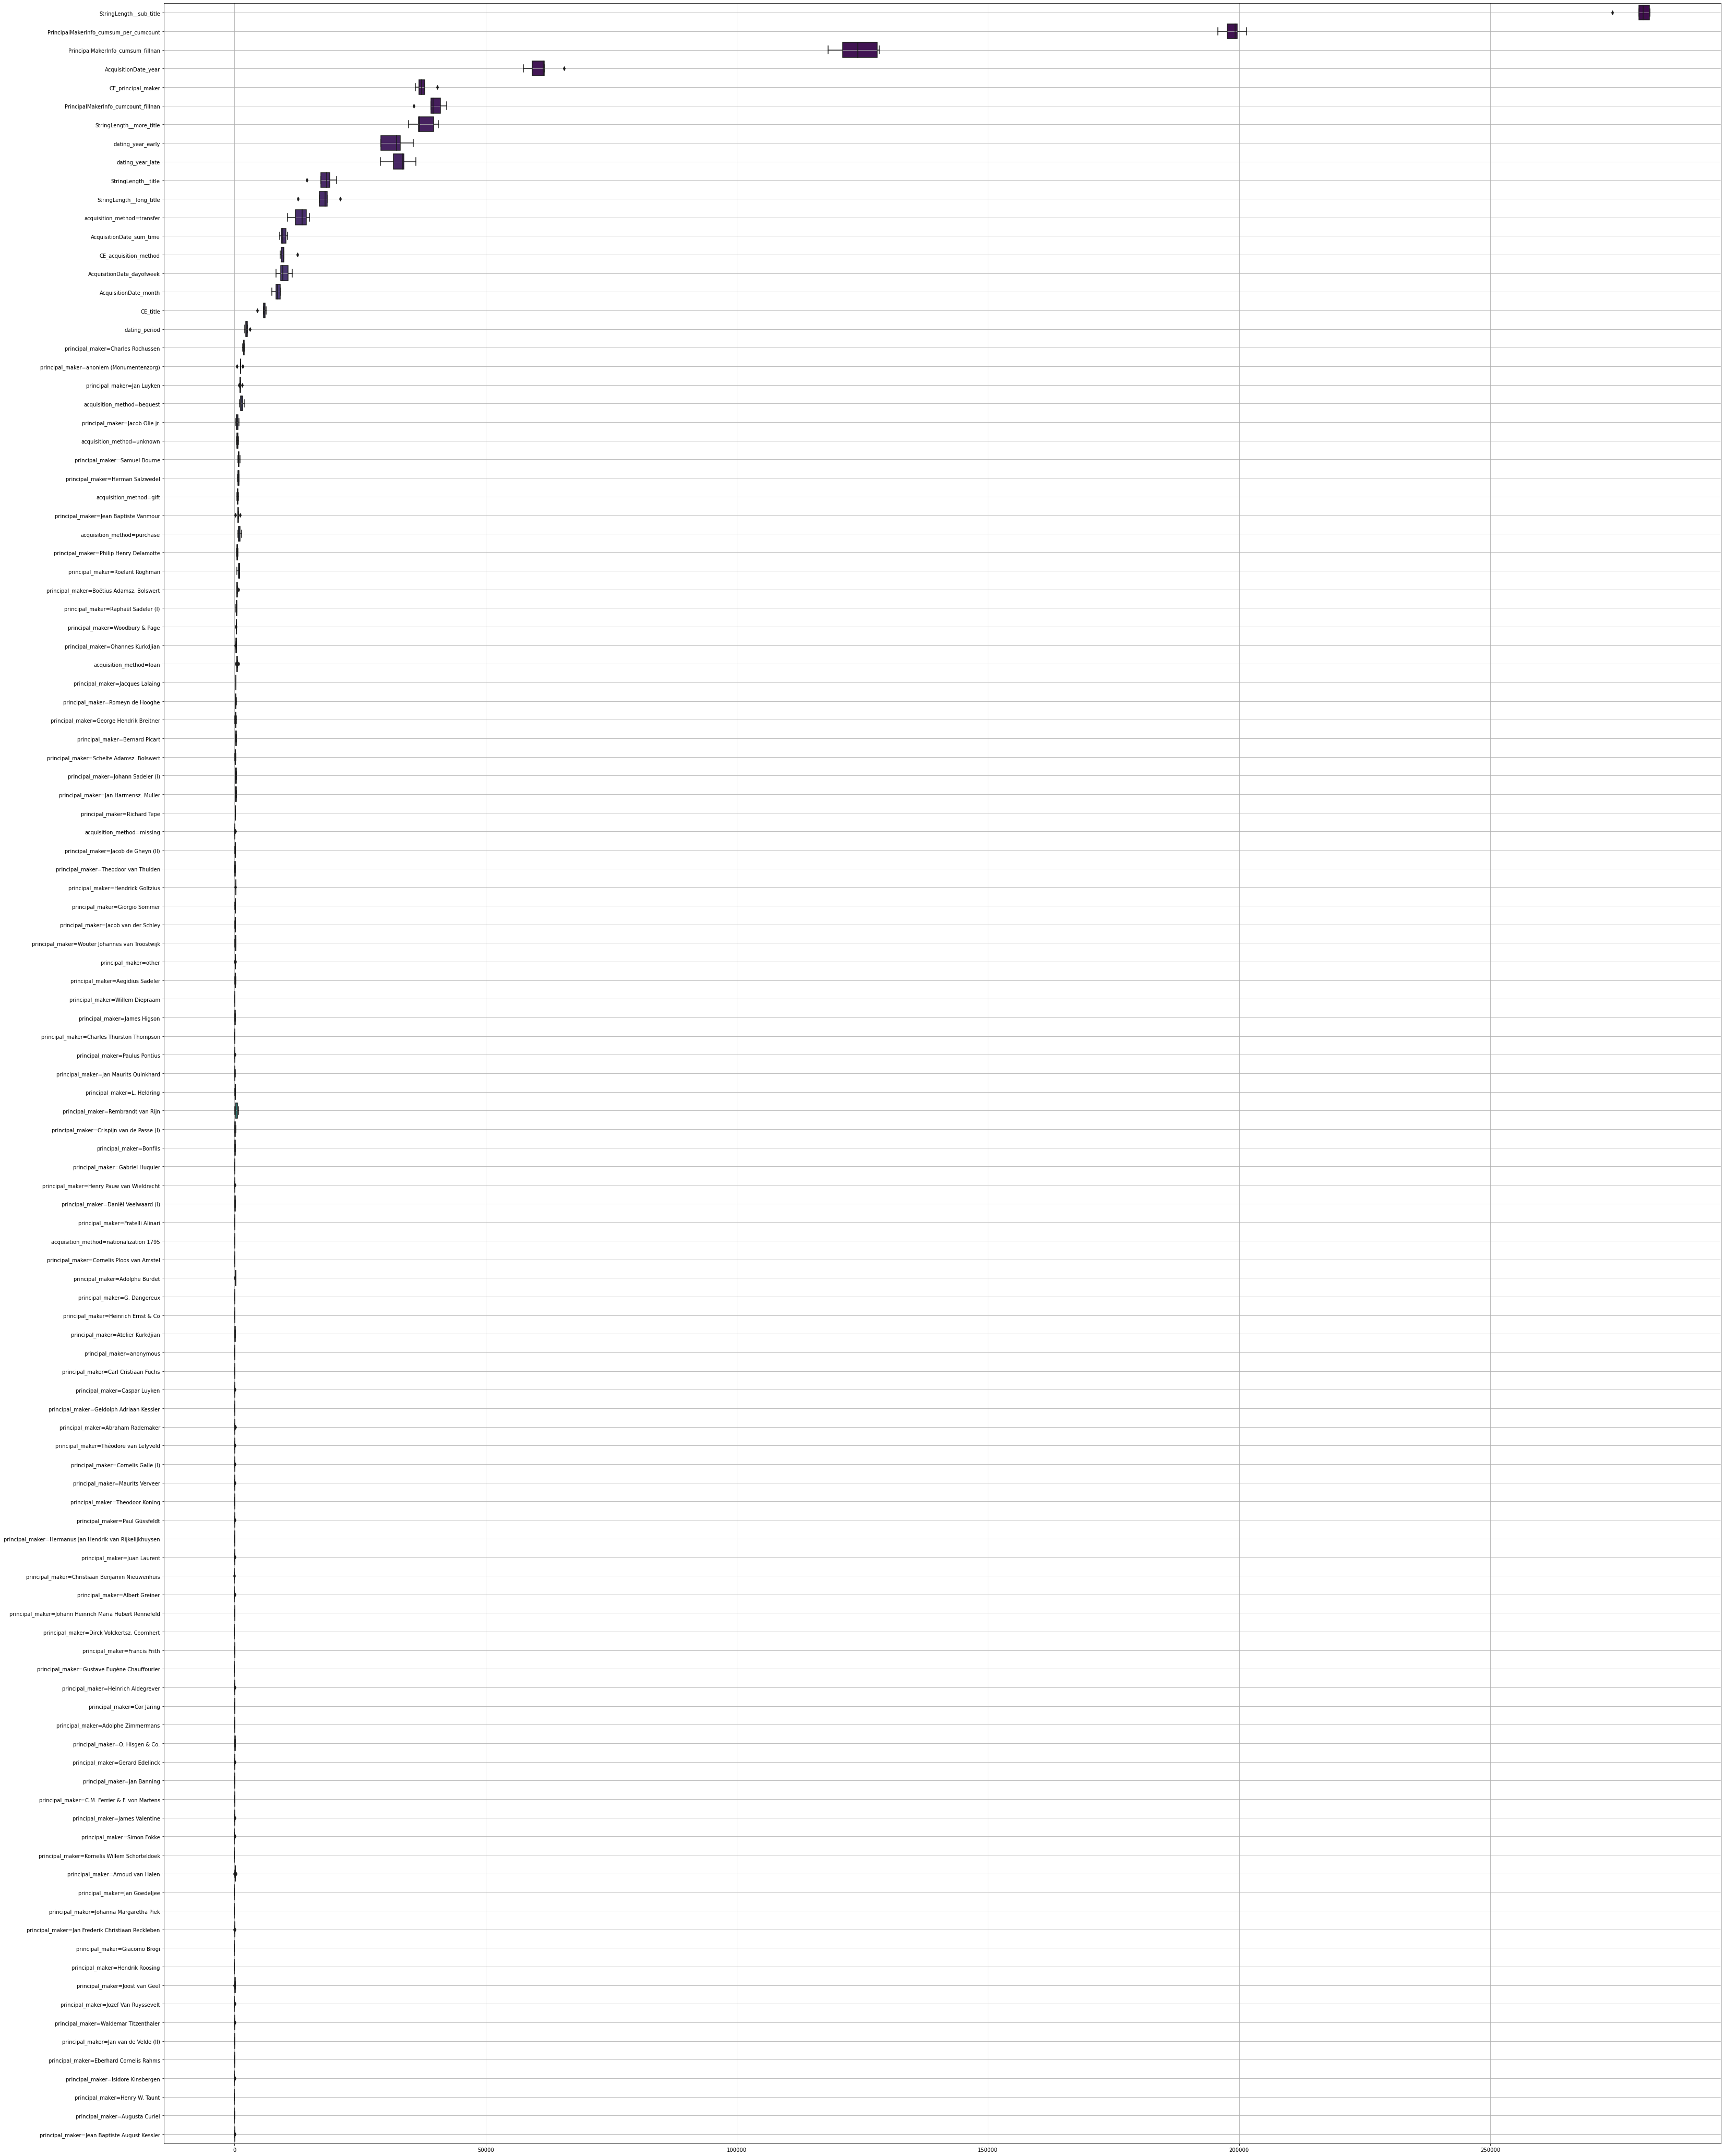

In [36]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance()

In [37]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [38]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [39]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [40]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210307170436_6_change_nan_anonymous/pred/pred_likes_1.0045.csv


In [41]:
sub_df.describe()

,likes
count,12008.000000
mean,26.216024
std,147.720750
min,0.000000
25%,0.982792
50%,2.655037
75%,7.615689
max,5088.919324


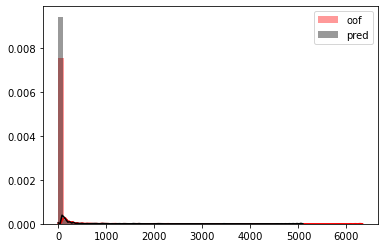

In [42]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)